In [358]:
import pandas as pd
import sqlalchemy
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 


In [359]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

weeks = [211002, 210925, 210918, 210911, 210904]
mta_data = get_data(weeks)

In [295]:
engine= sqlalchemy.create_engine('sqlite:///mta_data.db')
print(engine)

Engine(sqlite:///mta_data.db)


In [296]:
df = pd.read_sql('select * from mta_data limit 1;', engine)

In [89]:
mta_data_from_SQL = pd.read_sql('SELECT * FROM mta_data;', engine)

In [90]:
engine.table_names()


['mta_data']

In [91]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188


In [360]:
mta_data.columns = [column.strip() for column in mta_data.columns]
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [361]:
# Three weeks of Data
mta_data.DATE.value_counts().sort_index()

08/28/2021    30021
08/29/2021    29754
08/30/2021    30738
08/31/2021    29865
09/01/2021    30159
09/02/2021    29664
09/03/2021    29534
09/04/2021    29815
09/05/2021    29788
09/06/2021    29865
09/07/2021    30077
09/08/2021    29956
09/09/2021    29939
09/10/2021    30043
09/11/2021    29844
09/12/2021    30014
09/13/2021    30103
09/14/2021    30292
09/15/2021    29833
09/16/2021    29928
09/17/2021    29884
09/18/2021    29964
09/19/2021    29964
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
09/25/2021    29961
09/26/2021    29873
09/27/2021    30388
09/28/2021    30070
09/29/2021    30000
09/30/2021    30024
10/01/2021    29895
Name: DATE, dtype: int64

In [362]:
mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [95]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,2021-09-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,2021-09-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,2021-09-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,2021-09-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,2021-09-25 16:00:00


In [363]:
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1041351,S101,R070,00-00-02,ST. GEORGE,2021-09-14 16:00:00,2
1041267,S101,R070,00-00-02,ST. GEORGE,2021-09-01 00:00:00,2
1041258,S101,R070,00-00-02,ST. GEORGE,2021-08-30 12:00:00,2
1041425,S101,R070,00-00-02,ST. GEORGE,2021-09-27 00:00:00,2
1041424,S101,R070,00-00-02,ST. GEORGE,2021-09-26 20:00:00,2


In [364]:
mta_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [365]:
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-08-28 00:00:00,1
699566,R142,R293,01-00-00,34 ST-PENN STA,2021-09-04 14:00:00,1
699728,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 14:00:00,1
699729,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 18:00:00,1
699730,R142,R293,01-00-00,34 ST-PENN STA,2021-10-01 22:00:00,1


In [366]:
mta_data = mta_data.drop(["DESC"], axis=1, errors="ignore")

In [367]:
data_daily = (mta_data
                       .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"],as_index=False)
                       .ENTRIES.first())
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,08/28/2021,00:00:00,7625998
1,A002,R051,02-00-00,59 ST,08/28/2021,04:00:00,7626014
2,A002,R051,02-00-00,59 ST,08/28/2021,08:00:00,7626024
3,A002,R051,02-00-00,59 ST,08/28/2021,12:00:00,7626086
4,A002,R051,02-00-00,59 ST,08/28/2021,16:00:00,7626206


In [514]:
data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (data_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1704973439.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (data_daily


In [515]:
# Drop the rows for the earliest date in the df
data_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [516]:
data_daily[data_daily["ENTRIES"] < data_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
8187,A011,R080,01-03-00,57 ST-7 AV,08/28/2021,08:00:00,885578353,08/28/2021,885578365.0,12.0
8188,A011,R080,01-03-00,57 ST-7 AV,08/28/2021,12:00:00,885578333,08/28/2021,885578353.0,20.0
8189,A011,R080,01-03-00,57 ST-7 AV,08/28/2021,16:00:00,885578271,08/28/2021,885578333.0,62.0
8190,A011,R080,01-03-00,57 ST-7 AV,08/28/2021,20:00:00,885578194,08/28/2021,885578271.0,77.0
8191,A011,R080,01-03-00,57 ST-7 AV,08/29/2021,00:00:00,885578143,08/28/2021,885578194.0,51.0


In [518]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = data_daily.apply(get_daily_counts, axis=1, max_counter=20000)

393216 1.0
6 23972.0
10 468616.0
26 317688.0
27 9631915.0
151 5610355.0
149 132517.0
35 9769328.0
33565227 188201.0
17 31178.0
164 150473.0
66 3272795.0
64 124319.0
8 39027.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
1966428 196562.0
393216 461940.0
5 23234554.0
23234665 5.0
45 557914846.0
393220 458784.0
183 197843.0
13538 55826.0
55826 13538.0
35971 57107.0
57130 35971.0
35971 57130.0
57132 35971.0
320 44801.0
1 50541.0
50620 1.0
127 51962.0
52056 127.0
1 53679.0
53812 1.0
1 55277.0
55387 1.0
1 56468.0
56578 1.0
1 56716.0
56854 1.0
1 56978.0
57103 1.0
205 57332.0
57443 1.0
211 26258.0
261 120093.0
177 452864.0
2718 174019.0
174023 2718.0
129 71428.0
0 129729.0
26911 332760.0
332770 26911.0
12666 341535.0
341621 12666.0
12666 342038.0
342096 12666.0
265384 54590.0
54602 265384.0
38 97093.0
89 624773.0
0 28227.0
260 76465.0
19 55180.0
3 97815.0
205 40838.0
70 319276.0
21 120061.0
62 49969.0
5 11123659.0
43 3154069.0
130 28020.0
142 509694.0
0 458872.0
42 165

In [375]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
data_daily["DAILY_ENTRIES"] = data_daily.apply(get_daily_counts, axis=1, max_counter=20000)

393216 1.0
6 23972.0
10 468616.0
26 317688.0
27 9631915.0
151 5610355.0
149 132517.0
35 9769328.0
33565227 188201.0
17 31178.0
164 150473.0
66 3272795.0
64 124319.0
8 39027.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
1966428 196562.0
393216 461940.0
5 23234554.0
23234665 5.0
45 557914846.0
393220 458784.0
183 197843.0
13538 55826.0
55826 13538.0
35971 57107.0
57130 35971.0
35971 57130.0
57132 35971.0
320 44801.0
1 50541.0
50620 1.0
127 51962.0
52056 127.0
1 53679.0
53812 1.0
1 55277.0
55387 1.0
1 56468.0
56578 1.0
1 56716.0
56854 1.0
1 56978.0
57103 1.0
205 57332.0
57443 1.0
211 26258.0
261 120093.0
177 452864.0
2718 174019.0
174023 2718.0
129 71428.0
0 129729.0
26911 332760.0
332770 26911.0
12666 341535.0
341621 12666.0
12666 342038.0
342096 12666.0
265384 54590.0
54602 265384.0
38 97093.0
89 624773.0
0 28227.0
260 76465.0
19 55180.0
3 97815.0
205 40838.0
70 319276.0
21 120061.0
62 49969.0
11123659 4624026.0
5 11123659.0
1891101745 1104755.0
43 3154069.0
13

In [ ]:
___________________________________________________________________________________________________________________

In [143]:
St_herald_daily = data_daily[
(data_daily["STATION"] == "34 ST-HERALD SQ")&
(data_daily["C/A"] == "N506")&
(data_daily["UNIT"] == "R022")&
(data_daily["SCP"] == "00-05-05")]

St_herald_daily.sort_values("DAILY_ENTRIES", ascending = True 
                        ).head()



,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
505630,N506,R022,00-05-05,34 ST-HERALD SQ,09/02/2021,04:00:00,2552818,09/02/2021,2552803.0,15.0
505782,N506,R022,00-05-05,34 ST-HERALD SQ,09/27/2021,04:00:00,2597542,09/27/2021,2597525.0,17.0
505788,N506,R022,00-05-05,34 ST-HERALD SQ,09/28/2021,04:00:00,2599446,09/28/2021,2599426.0,20.0
505618,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,04:00:00,2549568,08/31/2021,2549546.0,22.0
505636,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,04:00:00,2554055,09/03/2021,2554031.0,24.0


In [178]:
St_herald_daily.TIME.unique()

array(['04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00',
       '00:00:00'], dtype=object)

In [177]:
St_herald_daily["TIME"].replace({"08:13:18": "08:00:00", "08:26:28": "08:00:00"}, inplace=True)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [155]:
St_herald_daily.TIME.unique()

array(['04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00',
       '00:00:00', '08:13:18', '08:26:28'], dtype=object)

In [ ]:
St_herald_daily["TIME"].replace({"08:20:18": "08:00:00", "10:28:19": "10:00:00", "07:53:19": "08:00:00","0": "08:00:00"}, inplace=True)

In [144]:
St_herald_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(St_herald_daily['DATE']).dt.dayofweek
St_herald_daily['WEEK_OF_YEAR'] = pd.to_datetime(St_herald_daily['DATE']).dt.week
St_herald_daily.sort_values("DAILY_ENTRIES", ascending = True 
                        ).head()

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1840652489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  St_herald_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(St_herald_daily['DATE']).dt.dayofweek
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1840652489.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  St_herald_daily['WEEK_OF_YEAR'] = pd.to_datetime(St_herald_daily['DATE']).dt.week
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1840652489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
505630,N506,R022,00-05-05,34 ST-HERALD SQ,09/02/2021,04:00:00,2552818,09/02/2021,2552803.0,15.0,3,35
505782,N506,R022,00-05-05,34 ST-HERALD SQ,09/27/2021,04:00:00,2597542,09/27/2021,2597525.0,17.0,0,39
505788,N506,R022,00-05-05,34 ST-HERALD SQ,09/28/2021,04:00:00,2599446,09/28/2021,2599426.0,20.0,1,39
505618,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,04:00:00,2549568,08/31/2021,2549546.0,22.0,1,35
505636,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,04:00:00,2554055,09/03/2021,2554031.0,24.0,4,35


In [349]:
St_herald_daily.TIME.unique()

array(['04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00',
       '00:00:00'], dtype=object)

In [324]:
St_herald_daily_tues = St_herald_daily[(St_herald_daily ["DAY_OF_WEEK_NUM"] == 1)]
St_herald_daily_tues.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
505617,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,00:00:00,2549546,08/30/2021,2549341.0,205.0,1,35
505618,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,04:00:00,2549568,08/31/2021,2549546.0,22.0,1,35
505619,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,08:00:00,2549771,08/31/2021,2549568.0,203.0,1,35
505620,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,12:00:00,2550114,08/31/2021,2549771.0,343.0,1,35
505621,N506,R022,00-05-05,34 ST-HERALD SQ,08/31/2021,16:00:00,2550519,08/31/2021,2550114.0,405.0,1,35


In [544]:
St_herald_daily_tues.DAILY_ENTRIES.mean()

304.1290322580645

In [347]:
St_herald_daily_wed = St_herald_daily[(St_herald_daily ["DAY_OF_WEEK_NUM"] == 2)]
St_herald_daily_wed.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
505623,N506,R022,00-05-05,34 ST-HERALD SQ,09/01/2021,00:00:00,2551309,08/31/2021,2551080.0,229.0,2,35
505624,N506,R022,00-05-05,34 ST-HERALD SQ,09/01/2021,04:00:00,2551338,09/01/2021,2551309.0,29.0,2,35
505625,N506,R022,00-05-05,34 ST-HERALD SQ,09/01/2021,08:00:00,2551567,09/01/2021,2551338.0,229.0,2,35
505626,N506,R022,00-05-05,34 ST-HERALD SQ,09/01/2021,12:00:00,2551853,09/01/2021,2551567.0,286.0,2,35
505627,N506,R022,00-05-05,34 ST-HERALD SQ,09/01/2021,16:00:00,2552207,09/01/2021,2551853.0,354.0,2,35


In [543]:
St_herald_daily_wed.DAILY_ENTRIES.mean()

303.741935483871

In [350]:
St_herald_daily_fri = St_herald_daily[(St_herald_daily ["DAY_OF_WEEK_NUM"] == 4)]
St_herald_daily_fri.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
505635,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,00:00:00,2554031,09/02/2021,2553853.0,178.0,4,35
505636,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,04:00:00,2554055,09/03/2021,2554031.0,24.0,4,35
505637,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,08:00:00,2554290,09/03/2021,2554055.0,235.0,4,35
505638,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,12:00:00,2554582,09/03/2021,2554290.0,292.0,4,35
505639,N506,R022,00-05-05,34 ST-HERALD SQ,09/03/2021,16:00:00,2555014,09/03/2021,2554582.0,432.0,4,35


In [542]:
St_herald_daily_fri.DAILY_ENTRIES.mean()

335.03333333333336

Text(0.5, 1.0, 'Daily Entries at 34 St-Herald SQ on Tuesdays')

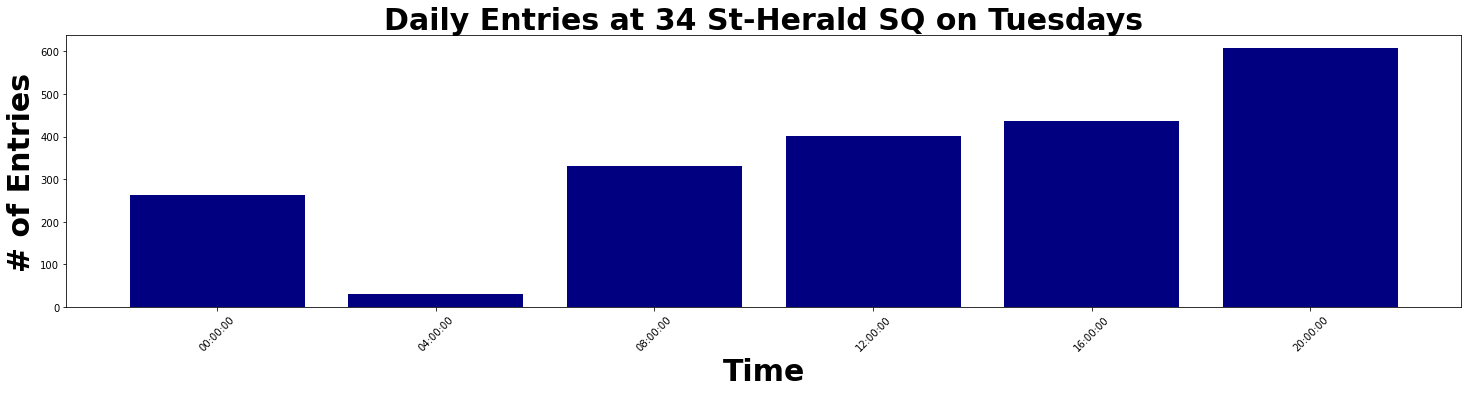

In [500]:
plt.figure(figsize=(25,5))
plt.bar(St_herald_daily_tues['TIME'], St_herald_daily_tues['DAILY_ENTRIES'], color=['navy'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at 34 St-Herald SQ on Tuesdays', fontsize = 30, weight = 'bold')

Text(0.5, 1.0, 'Daily Entries at 34 St-Herald SQ on Wednesdays')

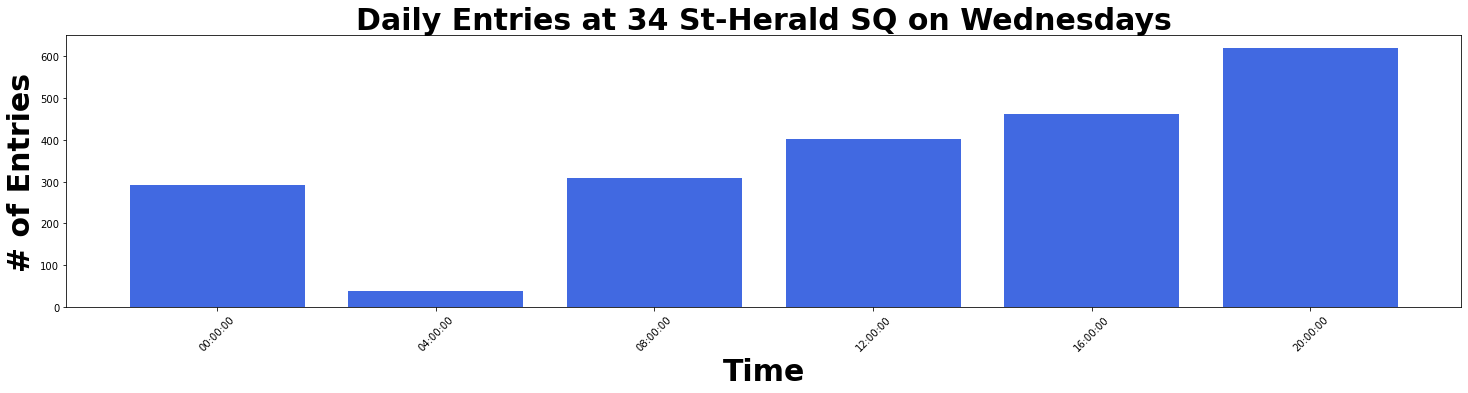

In [501]:
plt.figure(figsize=(25,5))
plt.bar(St_herald_daily_wed['TIME'], St_herald_daily_wed['DAILY_ENTRIES'], color=['royalblue'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at 34 St-Herald SQ on Wednesdays', fontsize = 30, weight = 'bold')

Text(0.5, 1.0, 'Daily Entries at 34 St-Herald SQ on Fridays')

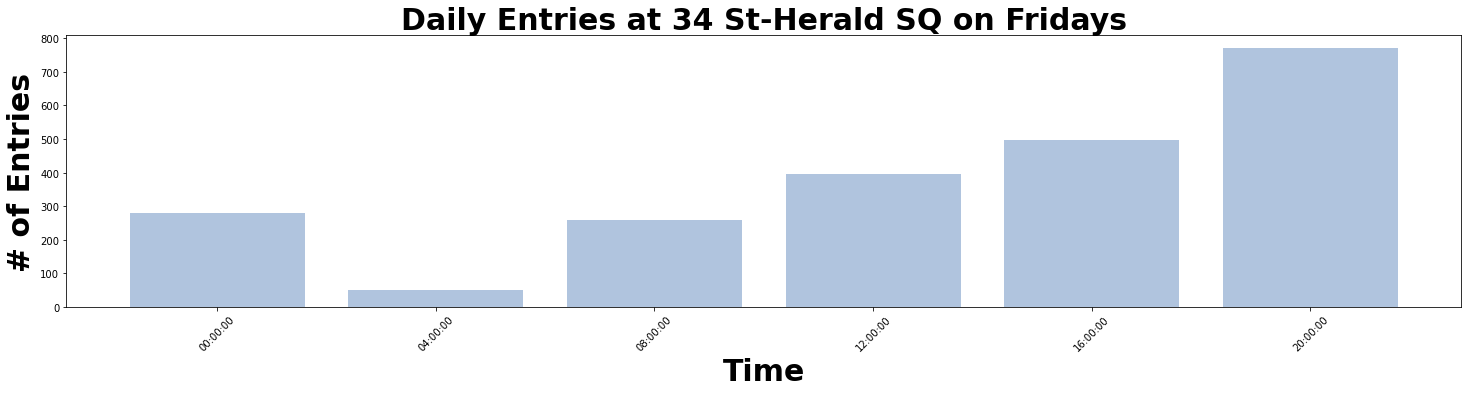

In [503]:
plt.figure(figsize=(25,5))
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.bar(St_herald_daily_fri['TIME'], St_herald_daily_fri['DAILY_ENTRIES'], color=['lightsteelblue'])

plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at 34 St-Herald SQ on Fridays', fontsize = 30, weight = 'bold')

In [ ]:
___________________________________________________________________________________________________________________

In [ ]:
#34th St- Penn Station

In [525]:
PENN_STA_TIME_DF = data_daily[
(data_daily["STATION"] == "34 ST-PENN STA")&
(data_daily["C/A"] == "R138")&
(data_daily["UNIT"] == "R293")&
(data_daily["SCP"] == "00-00-00")]


PENN_STA_TIME_DF.sort_values("DAILY_ENTRIES", ascending = False 
                        ).tail(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
693123,R138,R293,00-00-00,34 ST-PENN STA,09/05/2021,06:00:00,1182729,09/05/2021,1182691.0,38.0
693242,R138,R293,00-00-00,34 ST-PENN STA,09/25/2021,06:00:00,1222842,09/25/2021,1222807.0,35.0
693206,R138,R293,00-00-00,34 ST-PENN STA,09/19/2021,06:00:00,1210069,09/19/2021,1210035.0,34.0
693200,R138,R293,00-00-00,34 ST-PENN STA,09/18/2021,06:00:00,1208533,09/18/2021,1208500.0,33.0
693117,R138,R293,00-00-00,34 ST-PENN STA,09/04/2021,06:00:00,1181405,09/04/2021,1181373.0,32.0
693081,R138,R293,00-00-00,34 ST-PENN STA,08/29/2021,06:00:00,1171456,08/29/2021,1171430.0,26.0
693104,R138,R293,00-00-00,34 ST-PENN STA,09/02/2021,02:00:00,1178749,09/01/2021,1178724.0,25.0
693248,R138,R293,00-00-00,34 ST-PENN STA,09/26/2021,06:00:00,1224389,09/26/2021,1224365.0,24.0
693164,R138,R293,00-00-00,34 ST-PENN STA,09/12/2021,06:00:00,1195745,09/12/2021,1195725.0,20.0
693105,R138,R293,00-00-00,34 ST-PENN STA,09/02/2021,06:00:00,1178749,09/02/2021,1178749.0,0.0


In [526]:
PENN_STA_TIME_DF.TIME.unique()

array(['10:00:00', '14:00:00', '18:00:00', '22:00:00', '02:00:00',
       '06:00:00'], dtype=object)

In [527]:
PENN_STA_TIME_DF['DAY_OF_WEEK_NUM'] = pd.to_datetime(PENN_STA_TIME_DF['DATE']).dt.dayofweek
PENN_STA_TIME_DF['WEEK_OF_YEAR'] = pd.to_datetime(PENN_STA_TIME_DF['DATE']).dt.week
PENN_STA_TIME_DF.head()

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/84540769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PENN_STA_TIME_DF['DAY_OF_WEEK_NUM'] = pd.to_datetime(PENN_STA_TIME_DF['DATE']).dt.dayofweek
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/84540769.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  PENN_STA_TIME_DF['WEEK_OF_YEAR'] = pd.to_datetime(PENN_STA_TIME_DF['DATE']).dt.week
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/84540769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
693076,R138,R293,00-00-00,34 ST-PENN STA,08/28/2021,10:00:00,1170390,08/28/2021,1170199.0,191.0,5,34
693077,R138,R293,00-00-00,34 ST-PENN STA,08/28/2021,14:00:00,1170677,08/28/2021,1170390.0,287.0,5,34
693078,R138,R293,00-00-00,34 ST-PENN STA,08/28/2021,18:00:00,1170967,08/28/2021,1170677.0,290.0,5,34
693079,R138,R293,00-00-00,34 ST-PENN STA,08/28/2021,22:00:00,1171295,08/28/2021,1170967.0,328.0,5,34
693080,R138,R293,00-00-00,34 ST-PENN STA,08/29/2021,02:00:00,1171430,08/28/2021,1171295.0,135.0,6,34


In [528]:
PENN_STA_TIME_DF_tues = PENN_STA_TIME_DF[(PENN_STA_TIME_DF ["DAY_OF_WEEK_NUM"] == 1)]
PENN_STA_TIME_DF_tues.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
693092,R138,R293,00-00-00,34 ST-PENN STA,08/31/2021,02:00:00,1174688,08/30/2021,1174567.0,121.0,1,35
693093,R138,R293,00-00-00,34 ST-PENN STA,08/31/2021,06:00:00,1174761,08/31/2021,1174688.0,73.0,1,35
693094,R138,R293,00-00-00,34 ST-PENN STA,08/31/2021,10:00:00,1175537,08/31/2021,1174761.0,776.0,1,35
693095,R138,R293,00-00-00,34 ST-PENN STA,08/31/2021,14:00:00,1175906,08/31/2021,1175537.0,369.0,1,35
693096,R138,R293,00-00-00,34 ST-PENN STA,08/31/2021,18:00:00,1176378,08/31/2021,1175906.0,472.0,1,35


In [529]:
PENN_STA_TIME_DF_tues.DAILY_ENTRIES.mean()

370.9

In [531]:
PENN_STA_TIME_DF_wed = PENN_STA_TIME_DF[(PENN_STA_TIME_DF ["DAY_OF_WEEK_NUM"] == 2)]
PENN_STA_TIME_DF_wed.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
693098,R138,R293,00-00-00,34 ST-PENN STA,09/01/2021,02:00:00,1176870,08/31/2021,1176727.0,143.0,2,35
693099,R138,R293,00-00-00,34 ST-PENN STA,09/01/2021,06:00:00,1176923,09/01/2021,1176870.0,53.0,2,35
693100,R138,R293,00-00-00,34 ST-PENN STA,09/01/2021,10:00:00,1177732,09/01/2021,1176923.0,809.0,2,35
693101,R138,R293,00-00-00,34 ST-PENN STA,09/01/2021,14:00:00,1178035,09/01/2021,1177732.0,303.0,2,35
693102,R138,R293,00-00-00,34 ST-PENN STA,09/01/2021,18:00:00,1178423,09/01/2021,1178035.0,388.0,2,35


In [532]:
PENN_STA_TIME_DF_wed.DAILY_ENTRIES.mean()

361.03333333333336

In [533]:
PENN_STA_TIME_DF_fri = PENN_STA_TIME_DF[(PENN_STA_TIME_DF ["DAY_OF_WEEK_NUM"] == 4)]
PENN_STA_TIME_DF_fri.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
693110,R138,R293,00-00-00,34 ST-PENN STA,09/03/2021,02:00:00,1179561,09/02/2021,1179432.0,129.0,4,35
693111,R138,R293,00-00-00,34 ST-PENN STA,09/03/2021,06:00:00,1179629,09/03/2021,1179561.0,68.0,4,35
693112,R138,R293,00-00-00,34 ST-PENN STA,09/03/2021,10:00:00,1180179,09/03/2021,1179629.0,550.0,4,35
693113,R138,R293,00-00-00,34 ST-PENN STA,09/03/2021,14:00:00,1180488,09/03/2021,1180179.0,309.0,4,35
693114,R138,R293,00-00-00,34 ST-PENN STA,09/03/2021,18:00:00,1180880,09/03/2021,1180488.0,392.0,4,35


In [534]:
PENN_STA_TIME_DF_tues.DAILY_ENTRIES.mean()

370.9

Text(0.5, 1.0, 'Daily Entries at 34 St-Penn Station on Fridays')

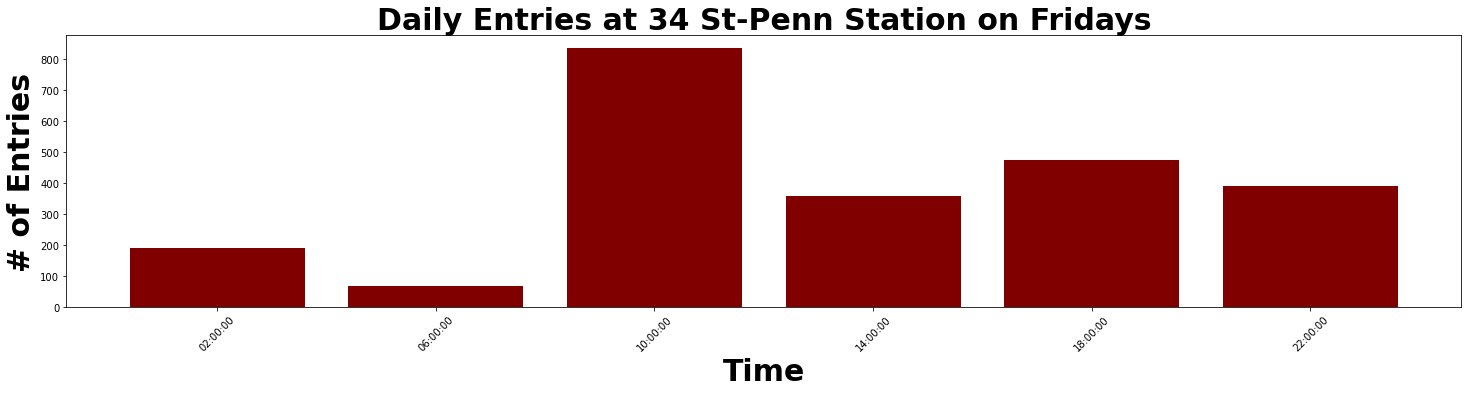

In [535]:
plt.figure(figsize=(25,5))
plt.bar(PENN_STA_TIME_DF_fri['TIME'], PENN_STA_TIME_DF_fri['DAILY_ENTRIES'], color=['maroon'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at 34 St-Penn Station on Fridays', fontsize = 30, weight = 'bold')

Text(0.5, 1.0, 'Daily Entries at 34 St-Penn Station on Wednesdays')

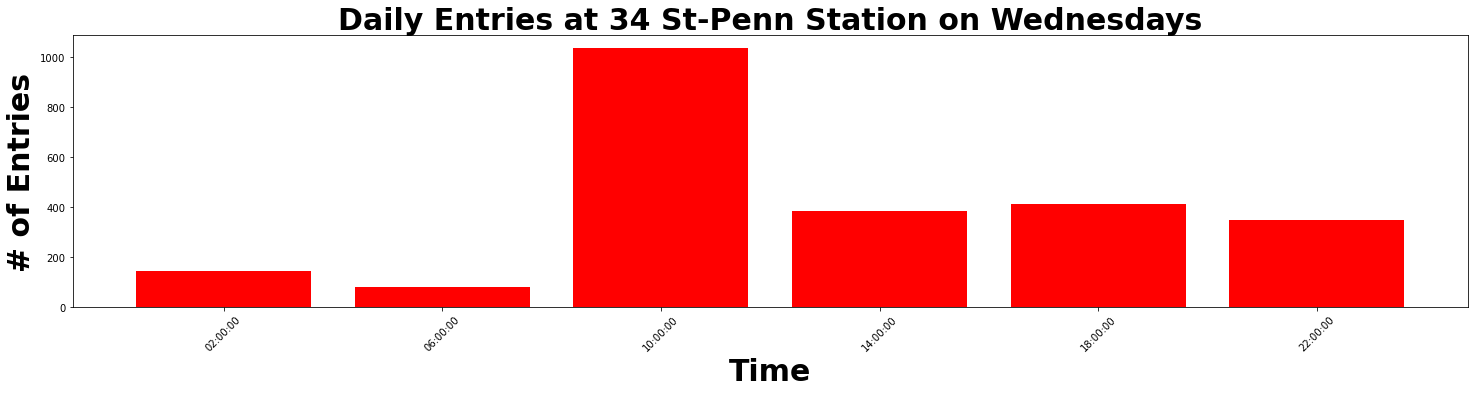

In [537]:
plt.figure(figsize=(25,5))
plt.bar(PENN_STA_TIME_DF_wed['TIME'], PENN_STA_TIME_DF_wed['DAILY_ENTRIES'], color=['red'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at 34 St-Penn Station on Wednesdays', fontsize = 30, weight = 'bold')

Text(0.5, 1.0, 'Daily Entries at 34 St-Penn Station on Tuesdays')

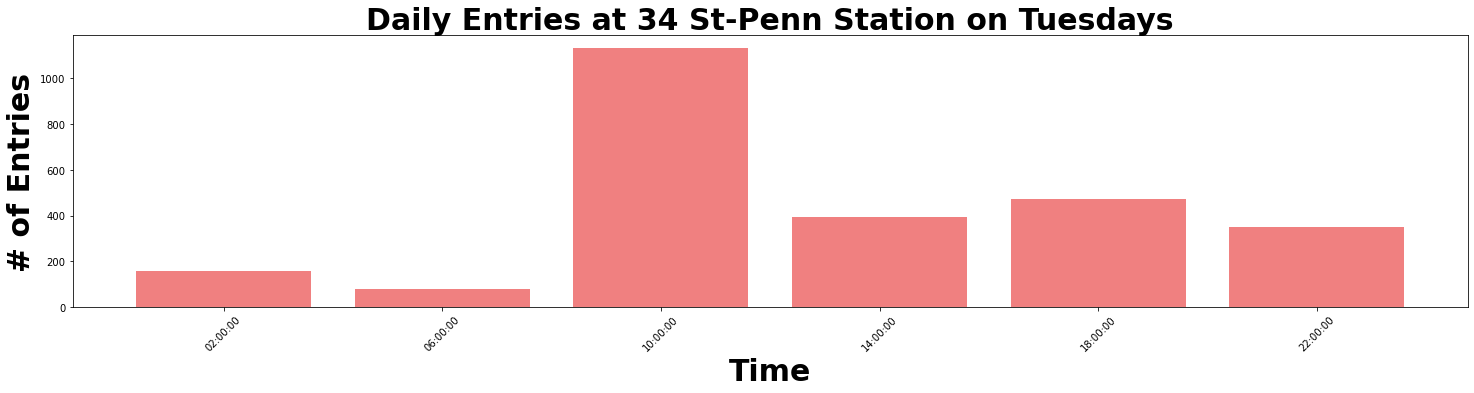

In [538]:
plt.figure(figsize=(25,5))
plt.bar(PENN_STA_TIME_DF_tues['TIME'], PENN_STA_TIME_DF_tues['DAILY_ENTRIES'], color=['lightcoral'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at 34 St-Penn Station on Tuesdays', fontsize = 30, weight = 'bold')

In [ ]:
___________________________________________________________________________________________________________________

In [ ]:
#GRD CNTRL-42 ST

In [136]:
grd_cntrl_daily = data_daily[
(data_daily["STATION"] == "GRD CNTRL-42 ST")&
(data_daily["C/A"] == "R238")&
(data_daily["UNIT"] == "R046")&
(data_daily["SCP"] == "00-06-01")]

grd_cntrl_daily.sort_values("DAILY_ENTRIES", ascending = False 
                        ).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
811070,R238,R046,00-06-01,GRD CNTRL-42 ST,09/24/2021,20:00:00,554227,09/24/2021,553132.0,1095.0
811016,R238,R046,00-06-01,GRD CNTRL-42 ST,09/15/2021,20:00:00,529440,09/15/2021,528409.0,1031.0
811106,R238,R046,00-06-01,GRD CNTRL-42 ST,09/30/2021,20:00:00,570676,09/30/2021,569647.0,1029.0
811058,R238,R046,00-06-01,GRD CNTRL-42 ST,09/22/2021,20:00:00,548006,09/22/2021,547021.0,985.0
811028,R238,R046,00-06-01,GRD CNTRL-42 ST,09/17/2021,20:00:00,535096,09/17/2021,534119.0,977.0


In [188]:
grd_cntrl_daily.TIME.unique()

array(['04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00',
       '00:00:00', '14:00:00'], dtype=object)

In [187]:
grd_cntrl_daily["TIME"].replace({"14:15:54": "14:00:00", "14:52:16": "14:00:00", "14:02:46": "14:00:00","14:09:32": "14:00:00"}, inplace=True)

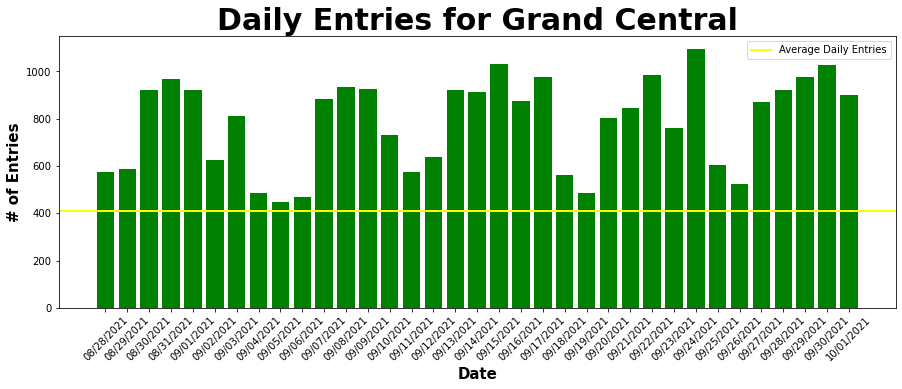

In [138]:
plt.figure(figsize=(15,5))
plt.bar(grd_cntrl_daily['DATE'], grd_cntrl_daily['DAILY_ENTRIES'], color = "green")
plt.ylabel('# of Entries', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries for Grand Central', fontsize = 30, weight = 'bold')
plt.axhline(grd_cntrl_daily["DAILY_ENTRIES"].mean(), color='yellow', linewidth=2, label = "Average Daily Entries")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')

In [139]:
grd_cntrl_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.dayofweek
grd_cntrl_daily['WEEK_OF_YEAR'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.week
grd_cntrl_daily.head()

/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1993822096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grd_cntrl_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.dayofweek
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1993822096.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  grd_cntrl_daily['WEEK_OF_YEAR'] = pd.to_datetime(grd_cntrl_daily['DATE']).dt.week
/var/folders/26/zk3z8t81481g1_jznhx727yh0000gn/T/ipykernel_11655/1993822096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
810894,R238,R046,00-06-01,GRD CNTRL-42 ST,08/28/2021,04:00:00,484026,08/28/2021,483931.0,95.0,5,34
810895,R238,R046,00-06-01,GRD CNTRL-42 ST,08/28/2021,08:00:00,484106,08/28/2021,484026.0,80.0,5,34
810896,R238,R046,00-06-01,GRD CNTRL-42 ST,08/28/2021,12:00:00,484433,08/28/2021,484106.0,327.0,5,34
810897,R238,R046,00-06-01,GRD CNTRL-42 ST,08/28/2021,16:00:00,484918,08/28/2021,484433.0,485.0,5,34
810898,R238,R046,00-06-01,GRD CNTRL-42 ST,08/28/2021,20:00:00,485491,08/28/2021,484918.0,573.0,5,34


In [236]:
mask_grand_central = grd_cntrl_daily[(grd_cntrl_daily ["DAY_OF_WEEK_NUM"] == 1)]
mask_grand_central.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
810911,R238,R046,00-06-01,GRD CNTRL-42 ST,08/31/2021,00:00:00,490619,08/30/2021,490309.0,310.0,1,35
810912,R238,R046,00-06-01,GRD CNTRL-42 ST,08/31/2021,04:00:00,490683,08/31/2021,490619.0,64.0,1,35
810913,R238,R046,00-06-01,GRD CNTRL-42 ST,08/31/2021,08:00:00,491094,08/31/2021,490683.0,411.0,1,35
810914,R238,R046,00-06-01,GRD CNTRL-42 ST,08/31/2021,12:00:00,491656,08/31/2021,491094.0,562.0,1,35
810915,R238,R046,00-06-01,GRD CNTRL-42 ST,08/31/2021,16:00:00,492162,08/31/2021,491656.0,506.0,1,35


In [539]:
mask_grand_central.DAILY_ENTRIES.mean()

492.56666666666666

In [240]:
mask_grand_central_wed = grd_cntrl_daily[(grd_cntrl_daily ["DAY_OF_WEEK_NUM"] == 2)]
mask_grand_central_wed.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
810917,R238,R046,00-06-01,GRD CNTRL-42 ST,09/01/2021,00:00:00,493499,08/31/2021,493132.0,367.0,2,35
810918,R238,R046,00-06-01,GRD CNTRL-42 ST,09/01/2021,04:00:00,493573,09/01/2021,493499.0,74.0,2,35
810919,R238,R046,00-06-01,GRD CNTRL-42 ST,09/01/2021,08:00:00,493949,09/01/2021,493573.0,376.0,2,35
810920,R238,R046,00-06-01,GRD CNTRL-42 ST,09/01/2021,12:00:00,494195,09/01/2021,493949.0,246.0,2,35
810921,R238,R046,00-06-01,GRD CNTRL-42 ST,09/01/2021,14:00:00,494231,09/01/2021,494195.0,36.0,2,35


In [540]:
mask_grand_central_wed.DAILY_ENTRIES.mean()

374.725

In [244]:
mask_grand_central_fri = grd_cntrl_daily[(grd_cntrl_daily ["DAY_OF_WEEK_NUM"] == 4)]
mask_grand_central_fri.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
810939,R238,R046,00-06-01,GRD CNTRL-42 ST,09/03/2021,00:00:00,497545,09/02/2021,497257.0,288.0,4,35
810940,R238,R046,00-06-01,GRD CNTRL-42 ST,09/03/2021,04:00:00,497610,09/03/2021,497545.0,65.0,4,35
810941,R238,R046,00-06-01,GRD CNTRL-42 ST,09/03/2021,08:00:00,497810,09/03/2021,497610.0,200.0,4,35
810942,R238,R046,00-06-01,GRD CNTRL-42 ST,09/03/2021,12:00:00,498331,09/03/2021,497810.0,521.0,4,35
810943,R238,R046,00-06-01,GRD CNTRL-42 ST,09/03/2021,16:00:00,498958,09/03/2021,498331.0,627.0,4,35


In [541]:
mask_grand_central_fri.DAILY_ENTRIES.mean()

484.5

Text(0.5, 1.0, 'Daily Entries at Grand Central on Tuesdays')

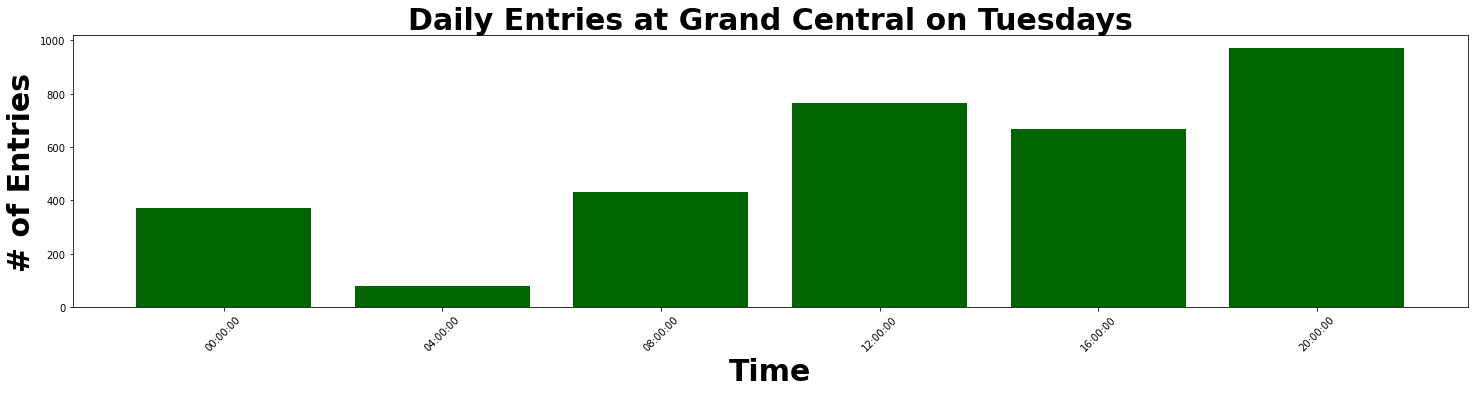

In [506]:
plt.figure(figsize=(25,5))
plt.bar(mask_grand_central['TIME'], mask_grand_central['DAILY_ENTRIES'], color=['darkgreen'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at Grand Central on Tuesdays', fontsize = 30, weight = 'bold')

Text(0.5, 1.0, 'Daily Entries at Grand Central on Wednesdays')

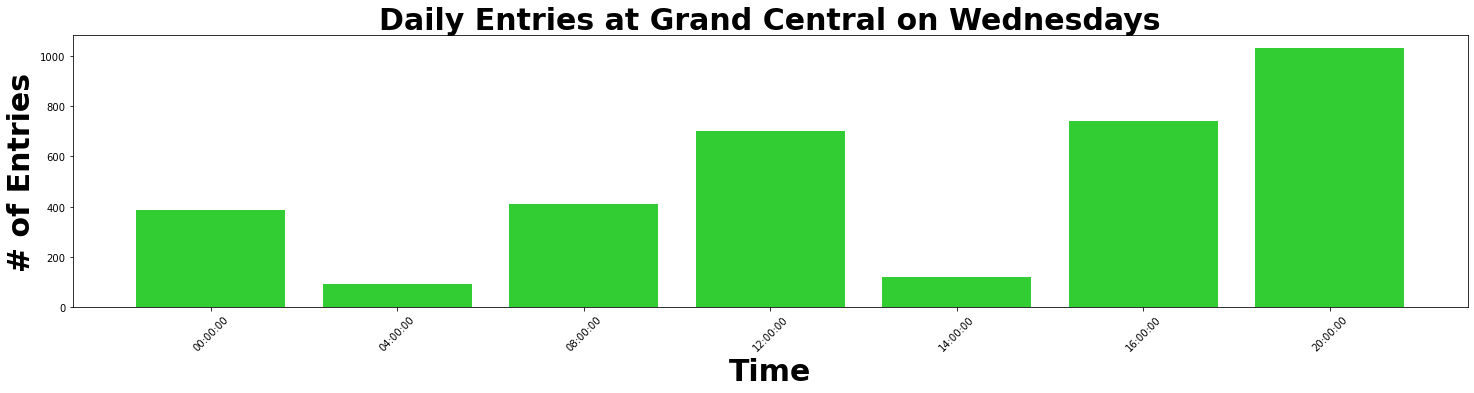

In [507]:
plt.figure(figsize=(25,5))
plt.bar(mask_grand_central_wed['TIME'], mask_grand_central_wed['DAILY_ENTRIES'], color=['limegreen'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at Grand Central on Wednesdays', fontsize = 30, weight = 'bold' )

Text(0.5, 1.0, 'Daily Entries at Grand Central on Fridays')

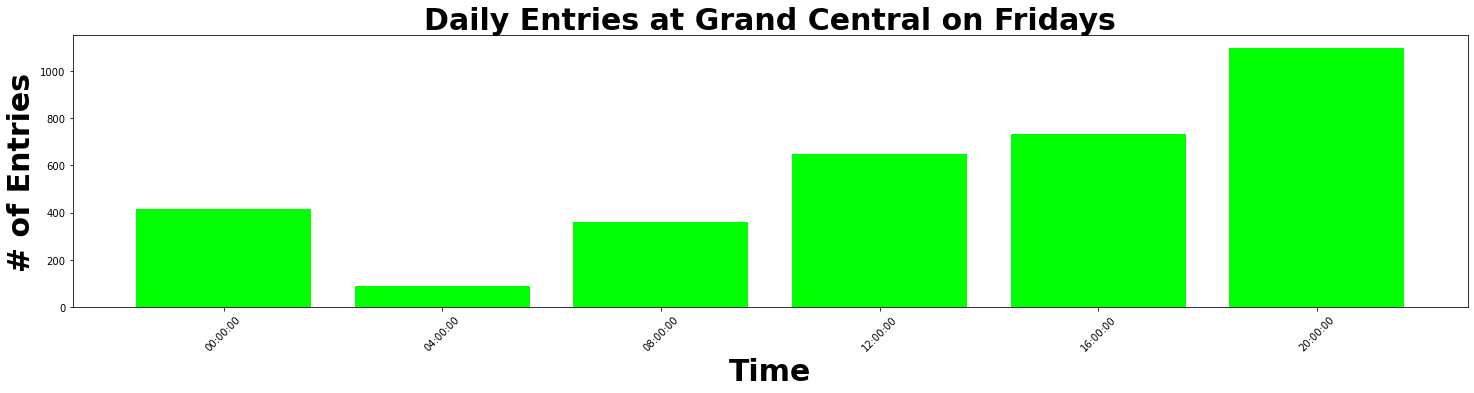

In [508]:
plt.figure(figsize=(25,5))
plt.bar(mask_grand_central_fri['TIME'], mask_grand_central_fri['DAILY_ENTRIES'], color=['lime'])
plt.ylabel('# of Entries', fontsize = 30, weight = 'bold')
plt.xlabel('Time', fontsize = 30, weight = 'bold')
plt.xticks(rotation=45)
plt.title('Daily Entries at Grand Central on Fridays', fontsize = 30, weight = 'bold')